In [1]:
import pandas as pd
import requests
import numpy as np

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def get_data(token):
    res = requests.get(
        f'https://api.cryptowat.ch/markets/coinbase-pro/{token}usd/ohlc',
        params={
            'periods': '3600',
            'after': str(int(pd.Timestamp('2021-11-22').timestamp()))
        }
    )

    df = pd.DataFrame(
        res.json()['result']['3600'],
        columns=['ts', 'open', 'high', 'low', 'close', 'volume', 'volumeUSD']
    )
    df['ts'] = pd.to_datetime(df.ts, unit='s')
    df['token'] = token
    
    return df

In [11]:
tokens = ['ETH', 'SOL', 'AVAX', 'USDT']



In my environment I cannot assess the FLOW data. It always return error, like below, so I drop flow in my homework

In [5]:
get_data("FLOW")

KeyError: 'result'

In [9]:
res = requests.get(
        f'https://api.cryptowat.ch/markets/coinbase-pro/{"FLOW"}usd/ohlc',
        params={
            'periods': '3600',
            'after': str(int(pd.Timestamp('2021-11-22').timestamp()))
        }
    )
res.json()

{'error': 'Market not found',
 'allowance': {'cost': 0.015,
  'remaining': 8.785,
  'upgrade': 'For unlimited API access, create an account at https://cryptowat.ch'}}

In [12]:
df_base = [get_data(token) for token in tokens]
df_base[0]

,ts,open,high,low,close,volume,volumeUSD,token
0,2021-11-22 00:00:00,4317.98,4342.24,4246.07,4262.99,7262.562789,3.123077e+07,ETH
1,2021-11-22 01:00:00,4263.04,4270.34,4212.45,4234.37,8437.946084,3.574586e+07,ETH
2,2021-11-22 02:00:00,4234.87,4246.72,4171.17,4217.89,9259.725370,3.895639e+07,ETH
3,2021-11-22 03:00:00,4217.88,4223.48,4163.58,4193.47,9259.899519,3.882032e+07,ETH
4,2021-11-22 04:00:00,4192.95,4213.59,4147.00,4168.35,7934.546906,3.315476e+07,ETH
...,...,...,...,...,...,...,...,...
459,2021-12-11 03:00:00,3970.74,3997.99,3956.05,3992.21,4685.686108,1.864206e+07,ETH
460,2021-12-11 04:00:00,3992.04,4042.95,3983.95,4010.77,10411.464128,4.183480e+07,ETH
461,2021-12-11 05:00:00,4011.58,4050.00,4010.62,4034.52,4566.717846,1.841549e+07,ETH
462,2021-12-11 06:00:00,4034.52,4049.55,4020.54,4033.17,3877.587062,1.563479e+07,ETH


In [14]:
df_base[1].volumeUSD.sum()

6173953830.682851

Get the total USD volume traded for each token in a dataframe, sorted from highest volume to lowest volume

In [ ]:
df_mutations.rename(
    columns={
        'open':'OpeningPrice',
        'chain':'CryptoChain'
    }
)

In [25]:
USD_Volume=pd.DataFrame(index=[tokens],columns=["USD_V"])

In [26]:
for i in range(len(tokens)):
    USD_Volume.iloc[i,0]=df_base[i].volumeUSD.sum()

In [28]:
USD_Volume.sort_values(by='USD_V',ascending=False)

,USD_V
ETH,18717782913.180134
SOL,6173953830.682851
AVAX,3155648089.95894
USDT,1803118723.468623


Add a column that calculates the close price ratio between ETH and SOL for each house (i.e. close price of ETH / close price of SOL for each period)

In [33]:
data_corr_ETH_SOL=df_base[0].set_index('ts')['close'].rename('ETH').to_frame().join(
    df_base[1].set_index('ts')['close'].rename("SOL").to_frame()
)
data_corr_ETH_SOL['ratio']=data_corr_ETH_SOL['ETH']/data_corr_ETH_SOL['SOL']
data_corr_ETH_SOL

,ETH,SOL,ratio
ts,,,
2021-11-22 00:00:00,4262.99,230.785,18.471694
2021-11-22 01:00:00,4234.37,226.000,18.736150
2021-11-22 02:00:00,4217.89,227.037,18.577985
2021-11-22 03:00:00,4193.47,223.117,18.794937
2021-11-22 04:00:00,4168.35,220.652,18.891059
...,...,...,...
2021-12-11 03:00:00,3992.21,168.010,23.761740
2021-12-11 04:00:00,4010.77,170.270,23.555353
2021-12-11 05:00:00,4034.52,170.960,23.599204


In [37]:
for i in range(len(df_base)):
    df_base[i].rename(
    columns={
        'volume':'volumeBase',
        'volumeUSD':'volumeTerm'
    },inplace=True
)

In [38]:
df_base[0]

,ts,open,high,low,close,volumeBase,volumeTerm,token
0,2021-11-22 00:00:00,4317.98,4342.24,4246.07,4262.99,7262.562789,3.123077e+07,ETH
1,2021-11-22 01:00:00,4263.04,4270.34,4212.45,4234.37,8437.946084,3.574586e+07,ETH
2,2021-11-22 02:00:00,4234.87,4246.72,4171.17,4217.89,9259.725370,3.895639e+07,ETH
3,2021-11-22 03:00:00,4217.88,4223.48,4163.58,4193.47,9259.899519,3.882032e+07,ETH
4,2021-11-22 04:00:00,4192.95,4213.59,4147.00,4168.35,7934.546906,3.315476e+07,ETH
...,...,...,...,...,...,...,...,...
459,2021-12-11 03:00:00,3970.74,3997.99,3956.05,3992.21,4685.686108,1.864206e+07,ETH
460,2021-12-11 04:00:00,3992.04,4042.95,3983.95,4010.77,10411.464128,4.183480e+07,ETH
461,2021-12-11 05:00:00,4011.58,4050.00,4010.62,4034.52,4566.717846,1.841549e+07,ETH
462,2021-12-11 06:00:00,4034.52,4049.55,4020.54,4033.17,3877.587062,1.563479e+07,ETH


create a fat table indexed by the timestamp, and each column is the close price of each token (i.e. this should be a table of 200 rows and 5 columns)

In [46]:
data=pd.concat([df_base[i].set_index('ts').rename(columns={'close':tokens[i]})\
           [[tokens[i]]] for i in range(len(tokens))],axis=1).head(200).dropna()

In [47]:
data

,ETH,SOL,AVAX,USDT
ts,,,,
2021-11-22 00:00:00,4262.99,230.785,128.67,1.0012
2021-11-22 01:00:00,4234.37,226.000,134.85,1.0013
2021-11-22 02:00:00,4217.89,227.037,132.54,1.0012
2021-11-22 03:00:00,4193.47,223.117,133.38,1.0011
2021-11-22 04:00:00,4168.35,220.652,136.29,1.0009
...,...,...,...,...
2021-11-30 03:00:00,4469.98,204.553,120.01,1.0010
2021-11-30 04:00:00,4439.05,203.908,118.27,1.0009
2021-11-30 05:00:00,4448.00,204.641,119.50,1.0010


In [50]:
returns=np.log(data/data.shift(1))
returns

,ETH,SOL,AVAX,USDT
ts,,,,
2021-11-22 00:00:00,NaN,NaN,NaN,NaN
2021-11-22 01:00:00,-0.006736,-0.020952,0.046912,0.0001
2021-11-22 02:00:00,-0.003900,0.004578,-0.017279,-0.0001
2021-11-22 03:00:00,-0.005806,-0.017417,0.006318,-0.0001
2021-11-22 04:00:00,-0.006008,-0.011109,0.021583,-0.0002
...,...,...,...,...
2021-11-30 03:00:00,0.001316,-0.002076,-0.003909,-0.0001
2021-11-30 04:00:00,-0.006944,-0.003158,-0.014605,-0.0001
2021-11-30 05:00:00,0.002014,0.003588,0.010346,0.0001


In [51]:
returns.corr()

,ETH,SOL,AVAX,USDT
ETH,1.000000,0.833941,0.606741,-0.119490
SOL,0.833941,1.000000,0.622749,-0.065401
AVAX,0.606741,0.622749,1.000000,-0.024824
USDT,-0.119490,-0.065401,-0.024824,1.000000


<AxesSubplot:>

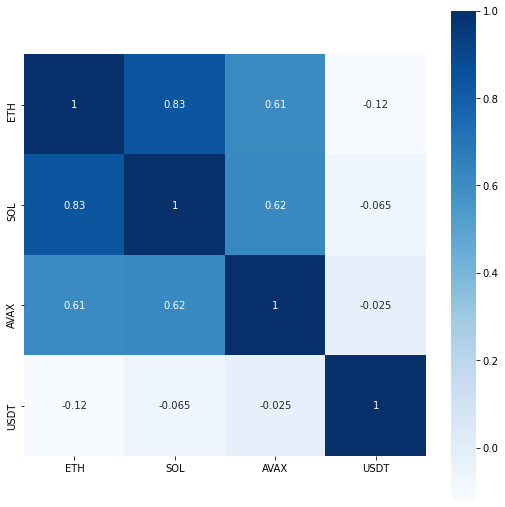

In [54]:
dfData = returns.corr()
plt.subplots(figsize=(9, 9)) # 
sns.heatmap(dfData, annot=True, vmax=1, square=True, cmap="Blues")
